In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import os
import numpy as np
from datetime import datetime




In [2]:
# Load in the county data for median ages

age_data = os.path.join("..","Project Data","county_data.csv")

age_df = pd.read_csv(age_data)

age_df.head()

,fips,county,state,state_code,male,female,median_age,population,female_percentage,lat,long
0,1001,Autauga County,Alabama,AL,26874,28326,37.8,55200,51.315217,32.534923,-86.642730
1,1003,Baldwin County,Alabama,AL,101188,106919,42.8,208107,51.376936,30.727479,-87.722564
2,1005,Barbour County,Alabama,AL,13697,12085,39.9,25782,46.873788,31.869581,-85.393210
3,1007,Bibb County,Alabama,AL,12152,10375,39.9,22527,46.055844,32.998628,-87.126475
4,1009,Blount County,Alabama,AL,28434,29211,40.8,57645,50.673953,33.980869,-86.567380


In [3]:
# Load in the county data for cases

case_data = os.path.join("..","Project Data","Cases by day by county.csv")

case_df = pd.read_csv(case_data)

case_df.head(20)


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/10/2020,6/11/2020,6/12/2020,6/13/2020,6/14/2020,6/15/2020,6/16/2020,6/17/2020,6/18/2020,6/19/2020
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,180,183,183,183,183,185,186,188,192,200
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,30,30,30,30,30,30,30,30,30,30
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,5329,5352,5536,5690,5811,5890,5951,6003,6111,6195
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,72,72,72,72,72,72,72,73,73,73
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,295,312,323,331,357,364,367,369,394,405
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,331,343,353,361,364,368,374,377,386,398
7,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,208,214,221,226,234,237,244,250,262,265
8,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,89,93,97,100,104,108,113,115,118,123
9,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,79,87,95,102,110,114,119,121,127,136


In [4]:
# Group Data by State

states_cases = case_df.groupby('Province_State').sum()

states_cases.head()

,UID,code3,FIPS,Lat,Long_,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,...,6/10/2020,6/11/2020,6/12/2020,6/13/2020,6/14/2020,6/15/2020,6/16/2020,6/17/2020,6/18/2020,6/19/2020
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,5796241491,57960,241491.0,2203.246784,-5809.578199,0,0,0,0,0,...,21989,22845,23710,24601,25615,26272,26912,27312,28206,29002
Alaska,2604232344,26040,232344.0,1747.579877,-4229.319334,0,0,0,0,0,...,592,609,624,653,660,663,675,695,707,720
American Samoa,16,16,60.0,-14.271000,-170.132000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,1428230216,14280,230216.0,505.138555,-1671.948482,0,0,0,0,1,...,29852,31267,33039,34660,35706,36844,39185,40937,43445,46910
Arkansas,6468550635,64680,550635.0,2618.391704,-6932.548370,0,0,0,0,0,...,10368,10816,11547,12095,12501,12917,13191,13606,13928,14631


In [5]:
# Drop non-state values and non-relevant columns
province_state_list = states_cases.reset_index()['Province_State']

province_state_list

0                      Alabama
1                       Alaska
2               American Samoa
3                      Arizona
4                     Arkansas
5                   California
6                     Colorado
7                  Connecticut
8                     Delaware
9             Diamond Princess
10        District of Columbia
11                     Florida
12                     Georgia
13              Grand Princess
14                        Guam
15                      Hawaii
16                       Idaho
17                    Illinois
18                     Indiana
19                        Iowa
20                      Kansas
21                    Kentucky
22                   Louisiana
23                       Maine
24                    Maryland
25               Massachusetts
26                    Michigan
27                   Minnesota
28                 Mississippi
29                    Missouri
30                     Montana
31                    Nebraska
32      

In [6]:
states_cases = states_cases.drop(axis=1, columns = ['UID','code3','FIPS','Lat','Long_'])
states_cases = states_cases.drop(['American Samoa',
                                  'Diamond Princess',
                                  'Grand Princess','Guam',
                                  'Northern Mariana Islands',
                                  'Puerto Rico',
                                  'Virgin Islands'])

states_cases.head()

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,6/10/2020,6/11/2020,6/12/2020,6/13/2020,6/14/2020,6/15/2020,6/16/2020,6/17/2020,6/18/2020,6/19/2020
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,21989,22845,23710,24601,25615,26272,26912,27312,28206,29002
Alaska,0,0,0,0,0,0,0,0,0,0,...,592,609,624,653,660,663,675,695,707,720
Arizona,0,0,0,0,1,1,1,1,1,1,...,29852,31267,33039,34660,35706,36844,39185,40937,43445,46910
Arkansas,0,0,0,0,0,0,0,0,0,0,...,10368,10816,11547,12095,12501,12917,13191,13606,13928,14631
California,0,0,0,0,2,2,2,2,2,3,...,139715,143377,146659,150018,152300,155726,158961,162798,167086,170862


In [7]:
# Create a list comprehension that results in a list of columns


date_columns = states_cases.columns

date_columns

states_cases_reset = states_cases.reset_index()
states_cases_df = states_cases_reset.melt(id_vars = 'Province_State',value_vars = date_columns)



states_cases_df.head()

,Province_State,variable,value
0,Alabama,1/22/2020,0
1,Alaska,1/22/2020,0
2,Arizona,1/22/2020,0
3,Arkansas,1/22/2020,0
4,California,1/22/2020,0


In [8]:
# Group by state

states_cases_group = states_cases_df.groupby('Province_State')


In [9]:
# Group by state and generate a list of final case values (thus far)

final_case_values = []

for states, states_df in states_cases_group:
    states_df['value'] = states_df['value'].replace(0,np.nan)
    final_case_value = states_df['value'].max()
    final_case_values.append(final_case_value)    

final_case_values

<ipython-input-9-d5f2a3030ea5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_df['value'] = states_df['value'].replace(0,np.nan)


[29002.0,
 720.0,
 46910.0,
 14631.0,
 170862.0,
 30172.0,
 45557.0,
 10611.0,
 9952.0,
 89748.0,
 62009.0,
 789.0,
 3871.0,
 135470.0,
 41746.0,
 25274.0,
 12021.0,
 13454.0,
 48634.0,
 2913.0,
 63548.0,
 106650.0,
 67097.0,
 32031.0,
 20641.0,
 17667.0,
 666.0,
 17588.0,
 12524.0,
 5486.0,
 168496.0,
 10260.0,
 386556.0,
 48167.0,
 3226.0,
 43731.0,
 9707.0,
 6572.0,
 85199.0,
 16337.0,
 22608.0,
 6158.0,
 34017.0,
 105394.0,
 16425.0,
 1144.0,
 56793.0,
 27601,
 2468.0,
 24154.0,
 1173.0]

In [10]:
# Add this to our original cases (grouped sum by state) dataframe as a column

states_cases['Total Cases'] = final_case_values

states_cases.head()



    

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,6/11/2020,6/12/2020,6/13/2020,6/14/2020,6/15/2020,6/16/2020,6/17/2020,6/18/2020,6/19/2020,Total Cases
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,22845,23710,24601,25615,26272,26912,27312,28206,29002,29002.0
Alaska,0,0,0,0,0,0,0,0,0,0,...,609,624,653,660,663,675,695,707,720,720.0
Arizona,0,0,0,0,1,1,1,1,1,1,...,31267,33039,34660,35706,36844,39185,40937,43445,46910,46910.0
Arkansas,0,0,0,0,0,0,0,0,0,0,...,10816,11547,12095,12501,12917,13191,13606,13928,14631,14631.0
California,0,0,0,0,2,2,2,2,2,3,...,143377,146659,150018,152300,155726,158961,162798,167086,170862,170862.0


In [11]:
# Calculate date of first case date and add as a column

states_cases['First Case Date'] = states_cases.keys()[np.argmax(states_cases.values!=0,axis=1)]
#states_cases['Current Case Date'] = states_cases.keys()[states_cases.values, np.argmax(axis=1)]

states_cases.head()

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,6/12/2020,6/13/2020,6/14/2020,6/15/2020,6/16/2020,6/17/2020,6/18/2020,6/19/2020,Total Cases,First Case Date
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,23710,24601,25615,26272,26912,27312,28206,29002,29002.0,3/13/2020
Alaska,0,0,0,0,0,0,0,0,0,0,...,624,653,660,663,675,695,707,720,720.0,3/13/2020
Arizona,0,0,0,0,1,1,1,1,1,1,...,33039,34660,35706,36844,39185,40937,43445,46910,46910.0,1/26/2020
Arkansas,0,0,0,0,0,0,0,0,0,0,...,11547,12095,12501,12917,13191,13606,13928,14631,14631.0,3/13/2020
California,0,0,0,0,2,2,2,2,2,3,...,146659,150018,152300,155726,158961,162798,167086,170862,170862.0,1/26/2020


In [12]:
### Calculate the average cases per day

In [13]:
# Convert final date (6/19/2020) to date format
x_date = datetime.strptime("6/19/2020", "%m/%d/%Y")


# convert first case date column to date format
states_cases['First Case Date'] =pd.to_datetime(states_cases['First Case Date'])
days_since_first_case = (x_date - states_cases['First Case Date'])

# Extract number from days_since_first_case string values and add as column to dataframe
states_cases['Days Since First Case'] = days_since_first_case.dt.days

states_cases.head()

# Whittle down the DF to required fields for analysis now that data has been extracted/calculated as needed

reorg_states_df = states_cases[['Total Cases','First Case Date','Days Since First Case']]

reorg_states_df.head()

# Add column that calculates cases per day

reorg_states_df['Cases per day'] = round(reorg_states_df['Total Cases']/reorg_states_df['Days Since First Case'],2)

reorg_states_df.head()


<ipython-input-13-d0e219e17e54>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reorg_states_df['Cases per day'] = round(reorg_states_df['Total Cases']/reorg_states_df['Days Since First Case'],2)


,Total Cases,First Case Date,Days Since First Case,Cases per day
Province_State,,,,
Alabama,29002.0,2020-03-13,98,295.94
Alaska,720.0,2020-03-13,98,7.35
Arizona,46910.0,2020-01-26,145,323.52
Arkansas,14631.0,2020-03-13,98,149.30
California,170862.0,2020-01-26,145,1178.36


In [14]:
# Load in the county data for mortality

mortality_data = os.path.join("..","Project Data","Deaths by day by county.csv")

mortality_df = pd.read_csv(mortality_data)

mortality_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/10/2020,6/11/2020,6/12/2020,6/13/2020,6/14/2020,6/15/2020,6/16/2020,6/17/2020,6/18/2020,6/19/2020
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,143,144,146,146,147,147,147,147,147,147
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,6,6,6,6,6,6,6,6,6,6


In [15]:
# Group Data by State

states_mortality = mortality_df.groupby('Province_State').sum()

states_mortality.head()

# Drop unnecessary columns

states_mortality = states_mortality.drop(axis=1, columns = ['UID','code3','FIPS','Lat','Long_','Population'])
states_mortality = states_mortality.drop(['American Samoa',
                                  'Diamond Princess',
                                  'Grand Princess','Guam',
                                  'Northern Mariana Islands',
                                  'Puerto Rico',
                                  'Virgin Islands'])
states_mortality.head()

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,6/10/2020,6/11/2020,6/12/2020,6/13/2020,6/14/2020,6/15/2020,6/16/2020,6/17/2020,6/18/2020,6/19/2020
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,744,755,769,773,773,774,785,790,810,822
Alaska,0,0,0,0,0,0,0,0,0,0,...,11,11,12,12,12,12,12,12,12,12
Arizona,0,0,0,0,0,0,0,0,0,0,...,1101,1135,1156,1189,1191,1203,1228,1249,1283,1321
Arkansas,0,0,0,0,0,0,0,0,0,0,...,165,171,176,177,179,182,188,197,208,214
California,0,0,0,0,0,0,0,0,0,0,...,4854,4934,4978,5076,5099,5114,5200,5271,5355,5426


In [16]:
# Create a new column for total deaths by state

states_mortality['Total Deaths'] = states_mortality.iloc[:,-1]

states_mortality.head()

### NEED TO ADD DATA FOR DEATHS THROUGH 6/19


,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,6/11/2020,6/12/2020,6/13/2020,6/14/2020,6/15/2020,6/16/2020,6/17/2020,6/18/2020,6/19/2020,Total Deaths
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,755,769,773,773,774,785,790,810,822,822
Alaska,0,0,0,0,0,0,0,0,0,0,...,11,12,12,12,12,12,12,12,12,12
Arizona,0,0,0,0,0,0,0,0,0,0,...,1135,1156,1189,1191,1203,1228,1249,1283,1321,1321
Arkansas,0,0,0,0,0,0,0,0,0,0,...,171,176,177,179,182,188,197,208,214,214
California,0,0,0,0,0,0,0,0,0,0,...,4934,4978,5076,5099,5114,5200,5271,5355,5426,5426


In [17]:
# Calculate first date of death by state
states_mortality['First Death Date'] = states_mortality.keys()[np.argmax(states_mortality.values!=0,axis=1)]

states_mortality.head()

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,6/12/2020,6/13/2020,6/14/2020,6/15/2020,6/16/2020,6/17/2020,6/18/2020,6/19/2020,Total Deaths,First Death Date
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,769,773,773,774,785,790,810,822,822,3/25/2020
Alaska,0,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,3/25/2020
Arizona,0,0,0,0,0,0,0,0,0,0,...,1156,1189,1191,1203,1228,1249,1283,1321,1321,3/21/2020
Arkansas,0,0,0,0,0,0,0,0,0,0,...,176,177,179,182,188,197,208,214,214,3/24/2020
California,0,0,0,0,0,0,0,0,0,0,...,4978,5076,5099,5114,5200,5271,5355,5426,5426,3/4/2020


In [18]:
# Calculate date of first death date and add as a column

states_mortality['First Death Date'] = states_mortality.keys()[np.argmax(states_mortality.values!=0,axis=1)]

states_mortality.head()


,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,6/12/2020,6/13/2020,6/14/2020,6/15/2020,6/16/2020,6/17/2020,6/18/2020,6/19/2020,Total Deaths,First Death Date
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,769,773,773,774,785,790,810,822,822,3/25/2020
Alaska,0,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,3/25/2020
Arizona,0,0,0,0,0,0,0,0,0,0,...,1156,1189,1191,1203,1228,1249,1283,1321,1321,3/21/2020
Arkansas,0,0,0,0,0,0,0,0,0,0,...,176,177,179,182,188,197,208,214,214,3/24/2020
California,0,0,0,0,0,0,0,0,0,0,...,4978,5076,5099,5114,5200,5271,5355,5426,5426,3/4/2020


In [19]:
# Calculate new deaths per day from first day by state

# Convert final date (6/19/2020) to date format
x_date = datetime.strptime("6/19/2020", "%m/%d/%Y")


# convert first case date column to date format
states_mortality['First Death Date'] =pd.to_datetime(states_mortality['First Death Date'])
days_since_first_death = (x_date - states_mortality['First Death Date'])

# Extract number from days_since_first_case string values and add as column to dataframe
states_mortality['Days Since First Death'] = days_since_first_death.dt.days

states_mortality.head()

# Whittle down the DF to required fields for analysis now that data has been extracted/calculated as needed

reorg_states_m_df = states_mortality[['Total Deaths','First Death Date','Days Since First Death']]

reorg_states_m_df.head()

# Add column that calculates cases per day

reorg_states_m_df['Deaths per day'] = round(reorg_states_m_df['Total Deaths']/reorg_states_m_df['Days Since First Death'],2)

reorg_states_m_df.head()

<ipython-input-19-be31b910504a>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reorg_states_m_df['Deaths per day'] = round(reorg_states_m_df['Total Deaths']/reorg_states_m_df['Days Since First Death'],2)


,Total Deaths,First Death Date,Days Since First Death,Deaths per day
Province_State,,,,
Alabama,822,2020-03-25,86,9.56
Alaska,12,2020-03-25,86,0.14
Arizona,1321,2020-03-21,90,14.68
Arkansas,214,2020-03-24,87,2.46
California,5426,2020-03-04,107,50.71


In [20]:
# Merge Case DataFrame with Death DataFrame

states_summary_df = pd.merge(reorg_states_df,reorg_states_m_df, on= 'Province_State')

states_summary_df.head()

,Total Cases,First Case Date,Days Since First Case,Cases per day,Total Deaths,First Death Date,Days Since First Death,Deaths per day
Province_State,,,,,,,,
Alabama,29002.0,2020-03-13,98,295.94,822,2020-03-25,86,9.56
Alaska,720.0,2020-03-13,98,7.35,12,2020-03-25,86,0.14
Arizona,46910.0,2020-01-26,145,323.52,1321,2020-03-21,90,14.68
Arkansas,14631.0,2020-03-13,98,149.30,214,2020-03-24,87,2.46
California,170862.0,2020-01-26,145,1178.36,5426,2020-03-04,107,50.71


In [21]:
# Load in the county median age data

age_file = os.path.join("..","Project Data","county_data.csv")

age_df = pd.read_csv(age_file)

In [22]:
# Clean the df and extract the median of the medians of the county age

age_df_cleaned = age_df[['county','state','median_age']]

age_df_cleaned.head()

median_state_age_df = round(age_df_cleaned.groupby('state').mean(),2)

median_state_age_df.head()

,median_age
state,
Alabama,40.63
Alaska,36.97
Arizona,40.23
Arkansas,41.43
California,39.61


In [23]:
# Merge data with states_summary_df above
median_state_age_df = median_state_age_df.reset_index()
median_state_age_df = median_state_age_df.rename(columns = {'state':'Province_State','median_age':'Mean of Median County Age'})
states_age_summary_df = pd.merge(states_summary_df,median_state_age_df,on='Province_State')

states_age_summary_df.head(1)

,Province_State,Total Cases,First Case Date,Days Since First Case,Cases per day,Total Deaths,First Death Date,Days Since First Death,Deaths per day,Mean of Median County Age
0,Alabama,29002.0,2020-03-13,98,295.94,822,2020-03-25,86,9.56,40.63


In [24]:
#drop the added index column

# states_age_summary_df = states_age_summary_df.drop(columns='index')

In [25]:
states_age_summary_df.head()

,Province_State,Total Cases,First Case Date,Days Since First Case,Cases per day,Total Deaths,First Death Date,Days Since First Death,Deaths per day,Mean of Median County Age
0,Alabama,29002.0,2020-03-13,98,295.94,822,2020-03-25,86,9.56,40.63
1,Alaska,720.0,2020-03-13,98,7.35,12,2020-03-25,86,0.14,36.97
2,Arizona,46910.0,2020-01-26,145,323.52,1321,2020-03-21,90,14.68,40.23
3,Arkansas,14631.0,2020-03-13,98,149.30,214,2020-03-24,87,2.46,41.43
4,California,170862.0,2020-01-26,145,1178.36,5426,2020-03-04,107,50.71,39.61


In [26]:
#Load in testing data by state

test_data = os.path.join("..","Project Data","testing_data.csv")

testing_df = pd.read_csv(test_data)

testing_df.head()


,Province_State,Tests per 100k Population,Cases,Deaths
0,Alabama,6599,577,16.6
1,Alaska,11009,96,1.6
2,Arizona,5295,606,17.9
3,Arkansas,7580,462,6.9
4,California,7772,422,13.5


In [27]:
#Drop unnecessary columns

testing_df = testing_df.reset_index().drop(columns =['Cases','Deaths','index'])

testing_df.head()

,Province_State,Tests per 100k Population
0,Alabama,6599
1,Alaska,11009
2,Arizona,5295
3,Arkansas,7580
4,California,7772


In [28]:
#Merge testing data with summary data

cases_age_summary_df = pd.merge(states_age_summary_df,testing_df,on = 'Province_State')

cases_age_summary_df

,Province_State,Total Cases,First Case Date,Days Since First Case,Cases per day,Total Deaths,First Death Date,Days Since First Death,Deaths per day,Mean of Median County Age,Tests per 100k Population
0,Alabama,29002.0,2020-03-13,98,295.94,822,2020-03-25,86,9.56,40.63,6599
1,Alaska,720.0,2020-03-13,98,7.35,12,2020-03-25,86,0.14,36.97,11009
2,Arizona,46910.0,2020-01-26,145,323.52,1321,2020-03-21,90,14.68,40.23,5295
3,Arkansas,14631.0,2020-03-13,98,149.30,214,2020-03-24,87,2.46,41.43,7580
4,California,170862.0,2020-01-26,145,1178.36,5426,2020-03-04,107,50.71,39.61,7772
5,Colorado,30172.0,2020-03-05,106,284.64,1643,2020-03-12,99,16.60,42.49,4604
6,Connecticut,45557.0,2020-03-10,101,451.06,4238,2020-03-18,93,45.57,41.70,10429
7,Delaware,10611.0,2020-03-11,100,106.11,433,2020-03-26,85,5.09,41.57,9169
8,District of Columbia,9952.0,2020-03-16,95,104.76,530,2020-03-20,91,5.82,33.90,10278
9,Florida,89748.0,2020-03-02,109,823.38,3104,2020-03-08,103,30.14,43.57,7096


In [29]:
#Load in weather data

weather_file = os.path.join("..","Project Data","temp_data.csv")

weather_df = pd.read_csv(weather_file)

weather_df.head()

,Location,Average Temp Mar-May
0,Alabama,60.3
1,Alabama,61.0
2,Alabama,63.6
3,Alabama,62.3
4,Alabama,63.0


In [30]:
# Group weather data by State

weather_states_df = round(weather_df.groupby('Location').mean(),2)

weather_states_df.head()



,Average Temp Mar-May
Location,
Alabama,64.18
Alaska,30.28
Arizona,62.24
Arkansas,60.59
California,54.33


In [31]:
# Merge weather data into summary ages/cases DataFrame
weather_reset = weather_states_df.reset_index()
weather_reset = weather_reset.rename(columns = {'Location':'Province_State'})



summary_df = pd.merge(cases_age_summary_df,weather_reset, on ='Province_State',how = 'left')

summary_df

,Province_State,Total Cases,First Case Date,Days Since First Case,Cases per day,Total Deaths,First Death Date,Days Since First Death,Deaths per day,Mean of Median County Age,Tests per 100k Population,Average Temp Mar-May
0,Alabama,29002.0,2020-03-13,98,295.94,822,2020-03-25,86,9.56,40.63,6599,64.18
1,Alaska,720.0,2020-03-13,98,7.35,12,2020-03-25,86,0.14,36.97,11009,30.28
2,Arizona,46910.0,2020-01-26,145,323.52,1321,2020-03-21,90,14.68,40.23,5295,62.24
3,Arkansas,14631.0,2020-03-13,98,149.30,214,2020-03-24,87,2.46,41.43,7580,60.59
4,California,170862.0,2020-01-26,145,1178.36,5426,2020-03-04,107,50.71,39.61,7772,54.33
5,Colorado,30172.0,2020-03-05,106,284.64,1643,2020-03-12,99,16.60,42.49,4604,45.82
6,Connecticut,45557.0,2020-03-10,101,451.06,4238,2020-03-18,93,45.57,41.70,10429,47.37
7,Delaware,10611.0,2020-03-11,100,106.11,433,2020-03-26,85,5.09,41.57,9169,53.85
8,District of Columbia,9952.0,2020-03-16,95,104.76,530,2020-03-20,91,5.82,33.90,10278,57.43
9,Florida,89748.0,2020-03-02,109,823.38,3104,2020-03-08,103,30.14,43.57,7096,74.73


In [32]:
# Calculate Death rate/# of cases 

summary_df['Mortality Rate'] = round(summary_df['Total Deaths']/summary_df['Total Cases'],4)

summary_df.head()


,Province_State,Total Cases,First Case Date,Days Since First Case,Cases per day,Total Deaths,First Death Date,Days Since First Death,Deaths per day,Mean of Median County Age,Tests per 100k Population,Average Temp Mar-May,Mortality Rate
0,Alabama,29002.0,2020-03-13,98,295.94,822,2020-03-25,86,9.56,40.63,6599,64.18,0.0283
1,Alaska,720.0,2020-03-13,98,7.35,12,2020-03-25,86,0.14,36.97,11009,30.28,0.0167
2,Arizona,46910.0,2020-01-26,145,323.52,1321,2020-03-21,90,14.68,40.23,5295,62.24,0.0282
3,Arkansas,14631.0,2020-03-13,98,149.30,214,2020-03-24,87,2.46,41.43,7580,60.59,0.0146
4,California,170862.0,2020-01-26,145,1178.36,5426,2020-03-04,107,50.71,39.61,7772,54.33,0.0318


In [33]:
# Narrow down to only necessary fields for regression analysis

regression_df = summary_df[['Province_State','Cases per day','Deaths per day','Mean of Median County Age','Tests per 100k Population','Average Temp Mar-May','Mortality Rate']]

regression_df.head()

,Province_State,Cases per day,Deaths per day,Mean of Median County Age,Tests per 100k Population,Average Temp Mar-May,Mortality Rate
0,Alabama,295.94,9.56,40.63,6599,64.18,0.0283
1,Alaska,7.35,0.14,36.97,11009,30.28,0.0167
2,Arizona,323.52,14.68,40.23,5295,62.24,0.0282
3,Arkansas,149.30,2.46,41.43,7580,60.59,0.0146
4,California,1178.36,50.71,39.61,7772,54.33,0.0318


In [34]:
## Perform Linear Regressions
# Set regression variables
x = regression_df['Mean of Median County Age']
y = regression_df['Tests per 100k Population']
z = regression_df['Average Temp Mar-May']



a = regression_df['Cases per day']
b = regression_df['Mortality Rate']


In [35]:
## Age

 The linear regression for these variables is y = -11.28x + 855.5 with an r-value of -0.0476 and an r-squared value of 0.0023.


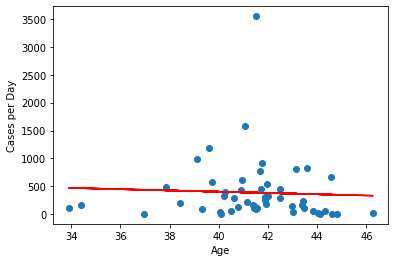

In [36]:
# Linear Regression Cases per day v Age

(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x,a)
regress_values = slope*x + intercept
plt.scatter(x,a)
plt.xlabel('Age')
plt.ylabel('Cases per Day')
plt.plot(x,regress_values, "r-")

print(f' The linear regression for these variables is y = {round(slope,2)}x + {round(intercept,2)} with an r-value of {round(rvalue,4)} and an r-squared value of {round(rvalue**2,4)}.')


 The linear regression for these variables is y = 0.11x + -0.54 with an r-value of 0.1284 and an r-squared value of 0.0165.


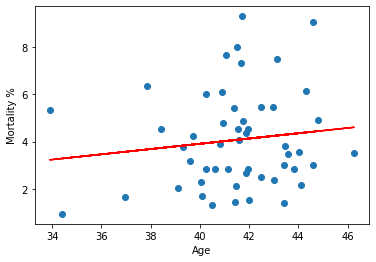

In [37]:
# Linear Regression Mortality Rate v Age
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x,b*100)
regress_values = slope*x + intercept
plt.scatter(x,b*100)
plt.xlabel('Age')
plt.ylabel('Mortality %')
plt.plot(x,regress_values, "r-")


print(f' The linear regression for these variables is y = {round(slope,2)}x + {round(intercept,2)} with an r-value of {round(rvalue,4)} and an r-squared value of {round(rvalue**2,4)}.')



In [38]:
## Testing

 The linear regression for these variables is y = 0.07x + -141.15 with an r-value of 0.3664 and an r-squared value of 0.1342.


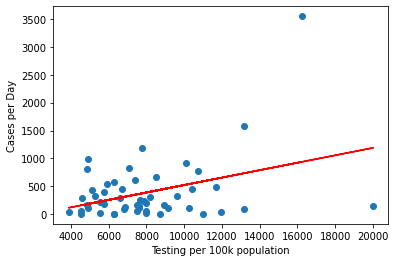

In [39]:
# Linear Regression Cases per day v Testing

(slope,intercept,rvalue,pvalue,stderr) = st.linregress(y,a)
regress_values = slope*y + intercept
plt.scatter(y,a)
plt.xlabel('Testing per 100k population')
plt.ylabel('Cases per Day')
plt.plot(y,regress_values, "r-")

print(f' The linear regression for these variables is y = {round(slope,2)}x + {round(intercept,2)} with an r-value of {round(rvalue,4)} and an r-squared value of {round(rvalue**2,4)}.')


 The linear regression for these variables is y = 0.0x + 2.27 with an r-value of 0.341 and an r-squared value of 0.1163.


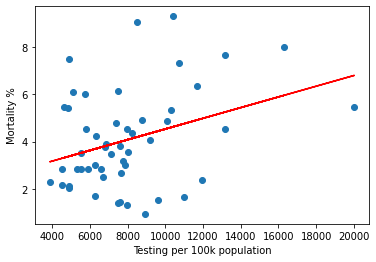

In [40]:
# Linear Regression Mortality v Testing

(slope,intercept,rvalue,pvalue,stderr) = st.linregress(y,b*100)
regress_values = slope*y + intercept
plt.scatter(y,b*100)
plt.xlabel('Testing per 100k population')
plt.ylabel('Mortality %')
plt.plot(y,regress_values, "r-")

print(f' The linear regression for these variables is y = {round(slope,2)}x + {round(intercept,2)} with an r-value of {round(rvalue,4)} and an r-squared value of {round(rvalue**2,4)}.')


In [41]:
## Weather (Temperature)

 The linear regression for these variables is y = 3.9x + 185.05 with an r-value of 0.0661 and an r-squared value of 0.0044.


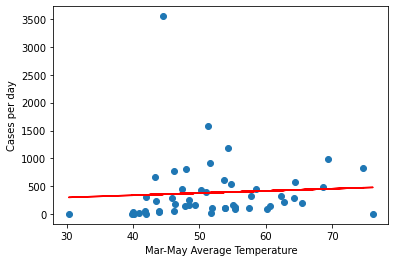

In [42]:
# Linear Regression Cases per day v Testing

(slope,intercept,rvalue,pvalue,stderr) = st.linregress(z,a)
regress_values = slope*z + intercept
plt.scatter(z,a)
plt.xlabel('Mar-May Average Temperature')
plt.ylabel('Cases per day')
plt.plot(z,regress_values, "r-")

print(f' The linear regression for these variables is y = {round(slope,2)}x + {round(intercept,2)} with an r-value of {round(rvalue,4)} and an r-squared value of {round(rvalue**2,4)}.')


 The linear regression for these variables is y = -0.03x + 5.52 with an r-value of -0.1298 and an r-squared value of 0.0168.


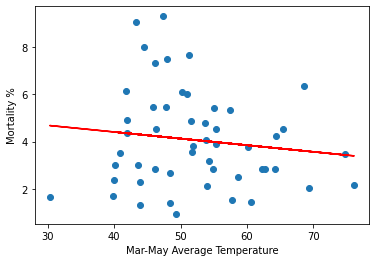

In [43]:
# Linear Regression Cases per day v Testing

(slope,intercept,rvalue,pvalue,stderr) = st.linregress(z,b*100)
regress_values = slope*z + intercept
plt.scatter(z,b*100)
plt.xlabel('Mar-May Average Temperature')
plt.ylabel('Mortality %')
plt.plot(z,regress_values, "r-")

print(f' The linear regression for these variables is y = {round(slope,2)}x + {round(intercept,2)} with an r-value of {round(rvalue,4)} and an r-squared value of {round(rvalue**2,4)}.')


In [44]:
# County Level Data comparison - 
## After seeing that virtually none of our comparisons at the state level showed a strong correlation - we wanted to compare to the county level

# Read in the county dataframe for Age and groupby county for  fips codes

age_df.head()


# Remove state

age_df_cleaned1 = age_df.drop(axis = 1, columns = ['population','state','state_code','male','female','female_percentage','lat','long'])

age_df_cleaned1.head(20)
                                                   
    
# Group By County

age_df_cleaned2 = age_df_cleaned1.groupby('county').mean()

age_df_cleaned2 = age_df_cleaned2.drop(columns = 'fips')

age_df_cleaned2 = age_df_cleaned2.reset_index()

age_df_cleaned2.head()



,county,median_age
0,Abbeville County,43.80
1,Acadia Parish,36.20
2,Accomack County,45.90
3,Ada County,36.70
4,Adair County,38.05


In [45]:
## Clean case and death data

In [46]:
# Clean case data columns
case_df2 = case_df.drop(axis=1, columns = ['UID','code3','Province_State','Lat','Long_','iso2','iso3','Country_Region',
                                          'Combined_Key'])

case_df2['Admin2'] = case_df2['Admin2'] + " County"

case_df2 = case_df2.rename(columns = {'Admin2':'county'})
case_df2 = case_df2.dropna()
case_df2.head(10)

,FIPS,county,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,...,6/10/2020,6/11/2020,6/12/2020,6/13/2020,6/14/2020,6/15/2020,6/16/2020,6/17/2020,6/18/2020,6/19/2020
5,1001.0,Autauga County,0,0,0,0,0,0,0,0,...,295,312,323,331,357,364,367,369,394,405
6,1003.0,Baldwin County,0,0,0,0,0,0,0,0,...,331,343,353,361,364,368,374,377,386,398
7,1005.0,Barbour County,0,0,0,0,0,0,0,0,...,208,214,221,226,234,237,244,250,262,265
8,1007.0,Bibb County,0,0,0,0,0,0,0,0,...,89,93,97,100,104,108,113,115,118,123
9,1009.0,Blount County,0,0,0,0,0,0,0,0,...,79,87,95,102,110,114,119,121,127,136
10,1011.0,Bullock County,0,0,0,0,0,0,0,0,...,248,253,258,276,302,305,308,311,318,318
11,1013.0,Butler County,0,0,0,0,0,0,0,0,...,471,484,499,517,536,541,548,551,563,567
12,1015.0,Calhoun County,0,0,0,0,0,0,0,0,...,182,184,188,190,195,196,198,200,202,202
13,1017.0,Chambers County,0,0,0,0,0,0,0,0,...,401,417,427,438,453,461,471,472,487,493
14,1019.0,Cherokee County,0,0,0,0,0,0,0,0,...,42,42,46,47,51,51,51,51,53,56


In [47]:
# Group FIPS by county

grouped_case_df2 = case_df2.groupby('county').sum()

grouped_case_df2 = grouped_case_df2.drop(columns = ['FIPS'])

grouped_case_df2 = grouped_case_df2.reset_index()
grouped_case_df2.head()

,county,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,...,6/10/2020,6/11/2020,6/12/2020,6/13/2020,6/14/2020,6/15/2020,6/16/2020,6/17/2020,6/18/2020,6/19/2020
0,Abbeville County,0,0,0,0,0,0,0,0,0,...,60,63,62,63,67,70,73,73,73,73
1,Acadia County,0,0,0,0,0,0,0,0,0,...,520,529,535,577,583,597,604,625,625,639
2,Accomack County,0,0,0,0,0,0,0,0,0,...,984,984,987,989,993,996,1007,1018,1018,1022
3,Ada County,0,0,0,0,0,0,0,0,0,...,854,854,877,877,892,892,915,986,1043,1100
4,Adair County,0,0,0,0,0,0,0,0,0,...,280,280,282,288,288,291,292,295,301,304


In [48]:
# Merge Case Data with Age Data


case_age_df = pd.merge(age_df_cleaned2,grouped_case_df2, how ='left', on='county')

case_age_df.head()

,county,median_age,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,...,6/10/2020,6/11/2020,6/12/2020,6/13/2020,6/14/2020,6/15/2020,6/16/2020,6/17/2020,6/18/2020,6/19/2020
0,Abbeville County,43.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,60.0,63.0,62.0,63.0,67.0,70.0,73.0,73.0,73.0,73.0
1,Acadia Parish,36.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Accomack County,45.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,984.0,984.0,987.0,989.0,993.0,996.0,1007.0,1018.0,1018.0,1022.0
3,Ada County,36.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,854.0,854.0,877.0,877.0,892.0,892.0,915.0,986.0,1043.0,1100.0
4,Adair County,38.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,280.0,280.0,282.0,288.0,288.0,291.0,292.0,295.0,301.0,304.0


In [49]:
# Get first case date per county

first_case_date_df = case_age_df.drop(axis=1,columns=['county','median_age'])

first_case_date_df['First Case Date'] = first_case_date_df.keys()[np.argmax(first_case_date_df.values!=0,axis=1)]

first_case_date_df.head()

case_age_df['First Case Date'] = first_case_date_df['First Case Date']

case_age_df2 = case_age_df.dropna(subset = ['First Case Date'])
case_age_df2 = case_age_df2.loc[case_age_df2['First Case Date'] != 'First Case Date',:]
case_age_df2 = case_age_df2.loc[case_age_df2['6/19/2020'] !=0]
case_age_df2.head()


,county,median_age,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,...,6/11/2020,6/12/2020,6/13/2020,6/14/2020,6/15/2020,6/16/2020,6/17/2020,6/18/2020,6/19/2020,First Case Date
0,Abbeville County,43.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,63.0,62.0,63.0,67.0,70.0,73.0,73.0,73.0,73.0,3/19/2020
1,Acadia Parish,36.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/22/2020
2,Accomack County,45.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,984.0,987.0,989.0,993.0,996.0,1007.0,1018.0,1018.0,1022.0,3/20/2020
3,Ada County,36.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,854.0,877.0,877.0,892.0,892.0,915.0,986.0,1043.0,1100.0,3/14/2020
4,Adair County,38.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,280.0,282.0,288.0,288.0,291.0,292.0,295.0,301.0,304.0,3/18/2020


In [50]:
# Calculate number of days since first case
case_age_df2['First Case Date'] =pd.to_datetime(case_age_df2['First Case Date'])


case_age_df2['First Case Date'].unique()

case_age_df2['Days Since First Case'] = (x_date - case_age_df2['First Case Date']).dt.days

case_age_df2['Cases per Day'] = round(case_age_df2['6/19/2020']/case_age_df2['Days Since First Case'],2)

case_age_df2.head()




,county,median_age,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,...,6/13/2020,6/14/2020,6/15/2020,6/16/2020,6/17/2020,6/18/2020,6/19/2020,First Case Date,Days Since First Case,Cases per Day
0,Abbeville County,43.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,63.0,67.0,70.0,73.0,73.0,73.0,73.0,2020-03-19,92,0.79
1,Acadia Parish,36.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-22,149,NaN
2,Accomack County,45.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,989.0,993.0,996.0,1007.0,1018.0,1018.0,1022.0,2020-03-20,91,11.23
3,Ada County,36.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,877.0,892.0,892.0,915.0,986.0,1043.0,1100.0,2020-03-14,97,11.34
4,Adair County,38.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,288.0,288.0,291.0,292.0,295.0,301.0,304.0,2020-03-18,93,3.27


In [51]:
#Whittle down case_age_df2

case_age_df3 =case_age_df2[['county','median_age','First Case Date','Days Since First Case','Cases per Day']]



case_age_df3.head()

,county,median_age,First Case Date,Days Since First Case,Cases per Day
0,Abbeville County,43.80,2020-03-19,92,0.79
1,Acadia Parish,36.20,2020-01-22,149,NaN
2,Accomack County,45.90,2020-03-20,91,11.23
3,Ada County,36.70,2020-03-14,97,11.34
4,Adair County,38.05,2020-03-18,93,3.27


In [52]:
# Clean mortality data columns
mortality_df2 = mortality_df.drop(axis=1, columns = ['UID','code3','Province_State','Lat','Long_','iso2','iso3','Country_Region',
                                          'Combined_Key','Population'])

mortality_df2 = mortality_df2.loc[mortality_df2['6/19/2020'] != 0,:]
mortality_df2 = mortality_df2.dropna()
mortality_df2 = mortality_df2.rename(columns = {'Admin2':'county'})

mortality_df2['county'] = mortality_df2['county'] + " County"
mortality_df2.head()

,FIPS,county,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,...,6/10/2020,6/11/2020,6/12/2020,6/13/2020,6/14/2020,6/15/2020,6/16/2020,6/17/2020,6/18/2020,6/19/2020
5,1001.0,Autauga County,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,7,7
6,1003.0,Baldwin County,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9
7,1005.0,Barbour County,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
8,1007.0,Bibb County,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
9,1009.0,Blount County,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [53]:
# Group by countys for FIPS

mortality_df2_grouped = mortality_df2.groupby('county').sum()

mortality_df2_grouped = mortality_df2_grouped.drop(columns = 'FIPS')



mortality_df2_grouped2 = mortality_df2_grouped.reset_index()

mortality_df2_grouped2.head()

,county,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,...,6/10/2020,6/11/2020,6/12/2020,6/13/2020,6/14/2020,6/15/2020,6/16/2020,6/17/2020,6/18/2020,6/19/2020
0,Acadia County,0,0,0,0,0,0,0,0,0,...,29,31,31,31,31,31,32,32,32,32
1,Accomack County,0,0,0,0,0,0,0,0,0,...,13,13,13,14,14,14,14,14,14,14
2,Ada County,0,0,0,0,0,0,0,0,0,...,22,22,22,22,22,22,22,22,22,22
3,Adair County,0,0,0,0,0,0,0,0,0,...,23,23,23,23,23,23,23,23,23,23
4,Adams County,0,0,0,0,0,0,0,0,0,...,184,184,184,185,185,186,189,193,194,195


In [54]:
# Get First Death Date per county

first_death_date_df = mortality_df2_grouped2.drop(columns = ['county'])

first_death_date_df['First Death Date'] = first_death_date_df.keys()[np.argmax(first_death_date_df.values!=0,axis=1)]

mortality_df2_grouped2['First Death Date'] = first_death_date_df['First Death Date']


mortality_df3 = mortality_df2_grouped2 
mortality_df3.head()

,county,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,...,6/11/2020,6/12/2020,6/13/2020,6/14/2020,6/15/2020,6/16/2020,6/17/2020,6/18/2020,6/19/2020,First Death Date
0,Acadia County,0,0,0,0,0,0,0,0,0,...,31,31,31,31,31,32,32,32,32,3/27/2020
1,Accomack County,0,0,0,0,0,0,0,0,0,...,13,13,14,14,14,14,14,14,14,4/22/2020
2,Ada County,0,0,0,0,0,0,0,0,0,...,22,22,22,22,22,22,22,22,22,3/29/2020
3,Adair County,0,0,0,0,0,0,0,0,0,...,23,23,23,23,23,23,23,23,23,4/7/2020
4,Adams County,0,0,0,0,0,0,0,0,0,...,184,184,185,185,186,189,193,194,195,3/31/2020


In [55]:
# Calculate days since first death
mortality_df3['First Death Date']=pd.to_datetime(mortality_df3['First Death Date'])

mortality_df3['Days Since First Death'] = (x_date - mortality_df3['First Death Date']).dt.days

mortality_df3['Deaths per Day'] = round(mortality_df3['6/19/2020']/mortality_df3['Days Since First Death'],2)

mortality_df3['county'].value_counts()



St. Helena County    1
Hempstead County     1
Adair County         1
Calvert County       1
Floyd County         1
                    ..
Kern County          1
Nicollet County      1
Columbiana County    1
Allegany County      1
Howard County        1
Name: county, Length: 1209, dtype: int64

In [56]:
# Whittle down mortality_df2 to necessary fields

mortality_df3 = mortality_df3[['county','First Death Date','Days Since First Death','Deaths per Day']]

mortality_df3 = mortality_df3.dropna()

mortality_df3.head()

,county,First Death Date,Days Since First Death,Deaths per Day
0,Acadia County,2020-03-27,84,0.38
1,Accomack County,2020-04-22,58,0.24
2,Ada County,2020-03-29,82,0.27
3,Adair County,2020-04-07,73,0.32
4,Adams County,2020-03-31,80,2.44


In [57]:
# Merge death dataframe with case_age dataframe

county_summary_df = pd.merge(case_age_df3,mortality_df3,how='left',on='county')

county_summary_df['county'].value_counts()

Copiah County      1
Mayes County       1
Baltimore city     1
Valley County      1
Frontier County    1
                  ..
Gonzales County    1
Siskiyou County    1
Jennings County    1
Caldwell Parish    1
Howard County      1
Name: county, Length: 1885, dtype: int64

In [58]:
# Add Mortality column and drop any counties with 0 cases
county_summary_df['Mortality %'] = round(100*(county_summary_df['Deaths per Day']/county_summary_df['Cases per Day']),2)
county_summary_df2 = county_summary_df.loc[county_summary_df['Cases per Day'] !=0,:]
county_summary_df2 = county_summary_df2.dropna()
county_summary_df2.head()

,county,median_age,First Case Date,Days Since First Case,Cases per Day,First Death Date,Days Since First Death,Deaths per Day,Mortality %
2,Accomack County,45.900000,2020-03-20,91,11.23,2020-04-22,58.0,0.24,2.14
3,Ada County,36.700000,2020-03-14,97,11.34,2020-03-29,82.0,0.27,2.38
4,Adair County,38.050000,2020-03-18,93,3.27,2020-04-07,73.0,0.32,9.79
5,Adams County,41.791667,2020-03-10,101,48.41,2020-03-31,80.0,2.44,5.04
6,Addison County,43.700000,2020-03-18,93,0.72,2020-04-12,68.0,0.03,4.17


In [59]:
# Drop null values
county_summary_df2 = county_summary_df2.dropna()
# Drop any values where Mortality = inf

county_summary_df3 = county_summary_df2.loc[county_summary_df2['Mortality %'] <100,:]



In [60]:
## Run Regressions at County Level


In [61]:
# Set County variables

x = county_summary_df3['median_age']


a = county_summary_df3['Cases per Day']


b = county_summary_df3['Mortality %']



 The linear regression for these variables is y = -0.912x + 54.87 with an r-squared value of 0.0034.


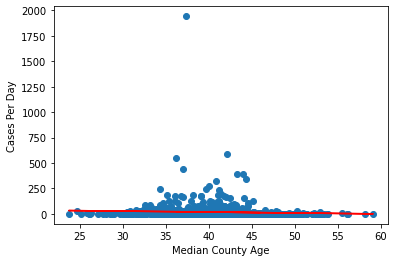

In [62]:
# Linear Regression Cases per day v median age

(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x,a)
regress_values = slope*x + intercept
plt.scatter(x,a)
plt.xlabel('Median County Age')
plt.ylabel('Cases Per Day')
plt.plot(x,regress_values, "r-")

print(f' The linear regression for these variables is y = {round(slope,4)}x + {round(intercept,2)} with an r-squared value of {round(rvalue**2,4)}.')

 The linear regression for these variables is y = 0.4299x + -9.74 with an r-squared value of 0.0417.


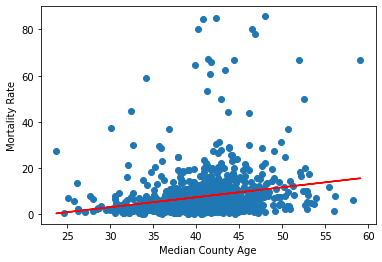

In [63]:
# Linear Regression Cases per day v median age

(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x,b)
regress_values = slope*x + intercept
plt.scatter(x,b)
plt.xlabel('Median County Age')
plt.ylabel('Mortality Rate')
plt.plot(x,regress_values, "r-")

print(f' The linear regression for these variables is y = {round(slope,4)}x + {round(intercept,2)} with an r-squared value of {round(rvalue**2,4)}.')